In [111]:
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import numpy as np

CUSTOM_FORMAT = {"with_labels" : False, "font_size": 4,
                "node_size": 20, "node_color": "#ff0000", "edgecolors": "#911a07",
                "width": 0.4, "edge_color": "black"}
import igraph as ig

In [115]:
len(G.nodes()), len(G.edges())

(405810, 883019)

In [2]:
G = nx.read_gexf('../PyPi Network.gexf')

In [3]:
G_ig = ig.Graph.from_networkx(G)

In [4]:
com_fg = G_ig.community_fastgreedy()

In [74]:
def clusters_to_list(clusters, G) -> dict:
    """
    Arma un diccionario con los nombres de los nodos
    como keys y el id del cluster como valor.
    """
    dic = {}
    clusters_list = []
    for i, cluster in enumerate(sorted(list(clusters), key = len, reverse = True)):
        nodes_in_cluster = []
        for node in cluster:
            nodes_in_cluster.append(G.vs[node]['_nx_name'])
        clusters_list.append(nodes_in_cluster)
    return clusters_list

In [81]:
clusters = com_fg.as_clustering()
communities = clusters_to_list(clusters, G_ig)

In [82]:
for i in range(15):
    print(len(communities[i]))

44312
42777
40141
22674
13705
11929
2462
1674
1209
1077
644
526
292
287
215


KeyError: 0

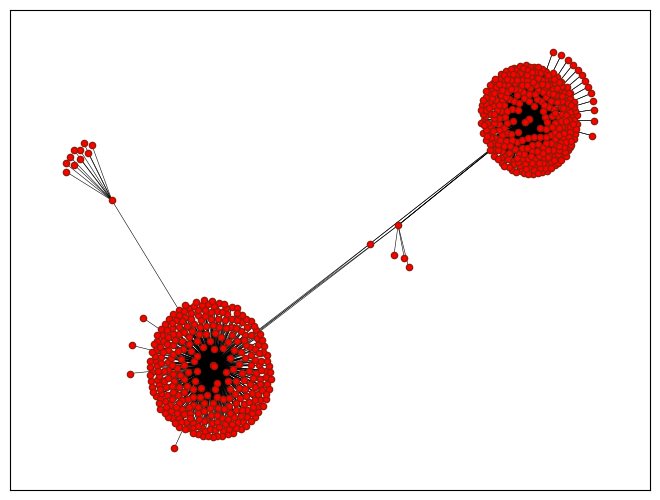

In [109]:
nodes_to_plot = communities[10]
G_com = G.subgraph(nodes_to_plot)
nx.draw(G_com, labels={i: str(i) for i in range(len(list(G_com.nodes())))}, **CUSTOM_FORMAT)

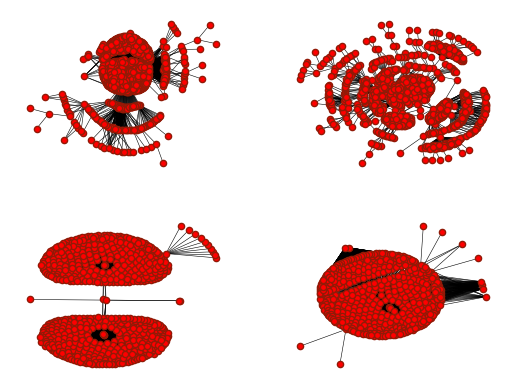

In [113]:
fig, axs = plt.subplots(2, 2)
axs = axs.flatten()
for i, com_ix in enumerate(range(8, 12)):
    nodes_to_plot = communities[com_ix]
    G_com = G.subgraph(nodes_to_plot)
    nx.draw_kamada_kawai(G_com, ax=axs[i], **CUSTOM_FORMAT)